### Import Libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from itertools import combinations, product
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [30]:
df = pd.read_csv('./data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- There are 3 numeric and 3 categoricla data types
- There are no null values 

### Duplicates

In [32]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


- There is 1 duplicate row

In [33]:
# Removing duplicates
df = df[~df.duplicated()]

In [34]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Encoding

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df = pd.concat([df, pd.get_dummies(df[['sex', 'region']], dtype=int)], axis=1)
df
df.drop(columns=['sex', 'region'])
df

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,0,0,0,1


### Distributions

In [37]:
df['sex'].value_counts(), df['sex'].value_counts(normalize=True)

(sex
 male      675
 female    662
 Name: count, dtype: int64,
 sex
 male      0.504862
 female    0.495138
 Name: proportion, dtype: float64)

In [38]:
df['smoker'].value_counts(), df['smoker'].value_counts(normalize=True)

(smoker
 no     1063
 yes     274
 Name: count, dtype: int64,
 smoker
 no     0.795064
 yes    0.204936
 Name: proportion, dtype: float64)

In [39]:
df['region'].value_counts(), df['region'].value_counts(normalize=True)

(region
 southeast    364
 southwest    325
 northwest    324
 northeast    324
 Name: count, dtype: int64,
 region
 southeast    0.272251
 southwest    0.243082
 northwest    0.242334
 northeast    0.242334
 Name: proportion, dtype: float64)

- age - Appoximately uniformly distributed
- bmi - Approximately normalized distribution
- children - Right skewed
- sex - Approximately equal volumes in each category
- smoker - Significantly more volumne in 'no'(79%) category than 'yes'(21%)
- region - Approximately equal volumes in each category
- charges - Right skewed

### Univariate Analysis

#### Numerical Features

<Axes: xlabel='age', ylabel='charges'>

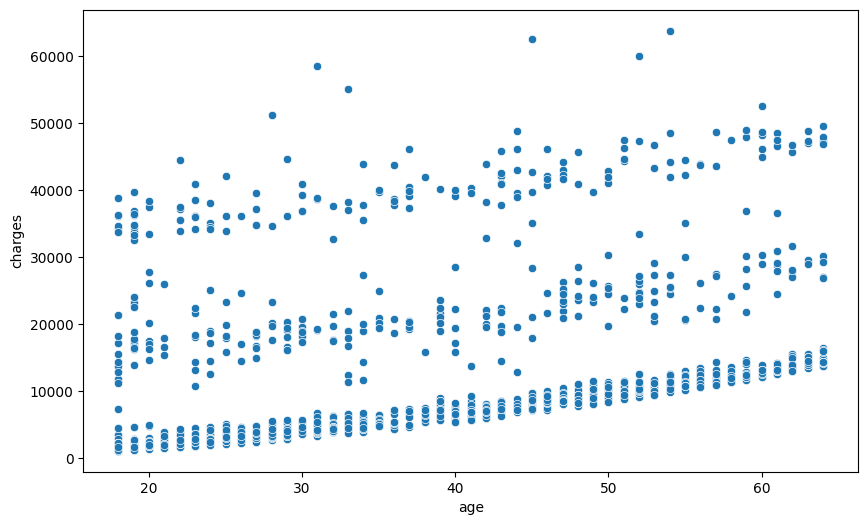

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='age', y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

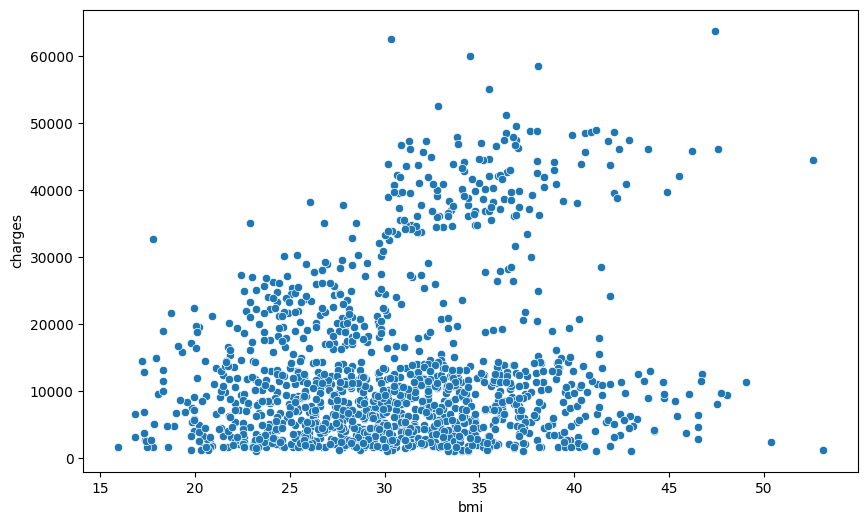

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='bmi', y='charges')

<Axes: xlabel='children', ylabel='charges'>

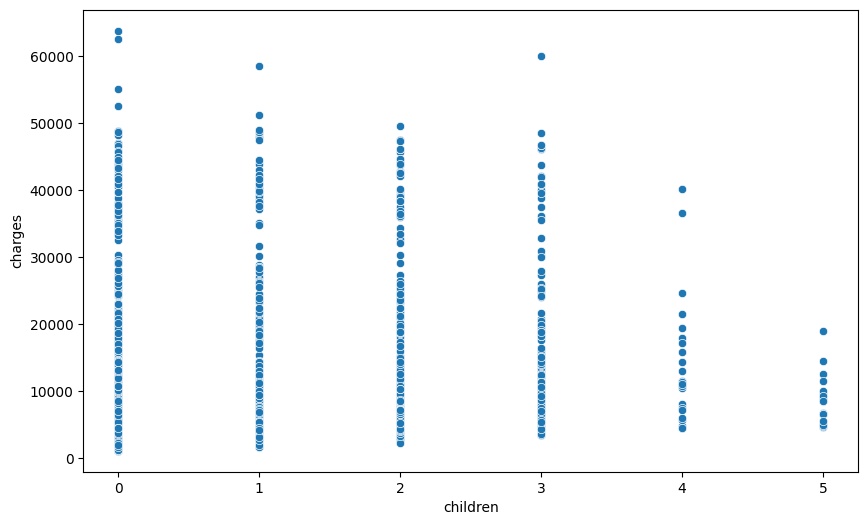

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='children', y='charges')

- age - As age increases, charges also increases. There is also a large variance in charges for given age
- bmi - There is no visible relationship, although there seems to be a group of individual with bmi>30 that have charges>30k.
- children - No visible relationship, althought charges seems to descrease as children increases. Since there are only 6 values for this variable. Trying to consider them as categorical feature

#### Categorical Features

<Axes: xlabel='sex', ylabel='charges'>

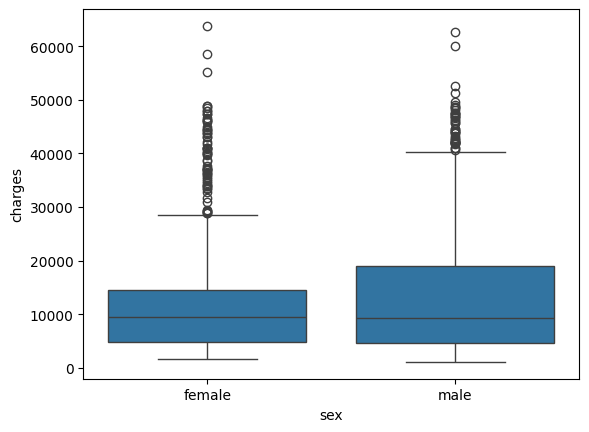

In [43]:
sns.boxplot(df, x='sex', y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

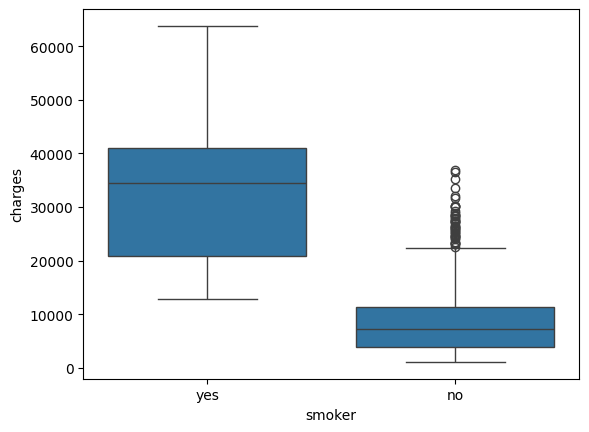

In [44]:
sns.boxplot(df, x='smoker', y='charges')

<Axes: xlabel='region', ylabel='charges'>

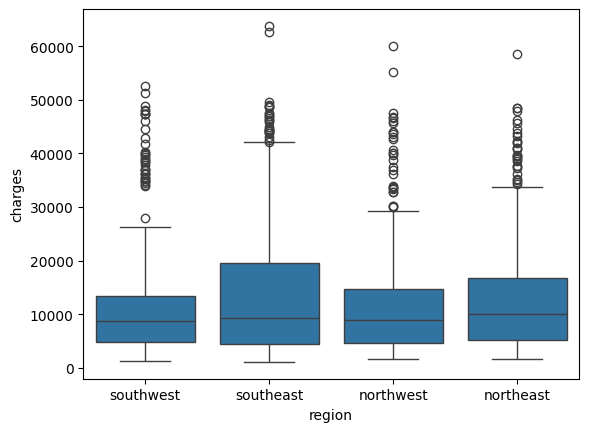

In [45]:
sns.boxplot(df, x='region', y='charges')

<Axes: xlabel='children', ylabel='charges'>

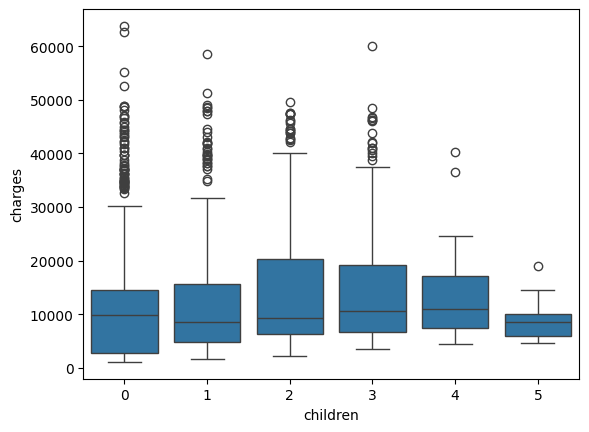

In [46]:
sns.boxplot(df, x='children', y='charges')

- sex - There is no significant difference between both categories, although males have slightly higher charges than females
- smoker - smokers have significant higher charges than non-smokers
- region - There is no significant difference between regions, although southeast region have slightly higher chrages than other regions
- children - There is no significant difference between childrens, although charges tends to decrease as children increases. 

### Bivariate Analysis

#### BMI - Region

<Axes: xlabel='region', ylabel='bmi'>

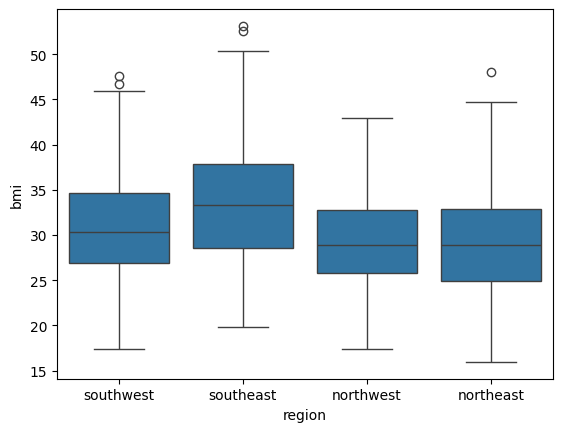

In [47]:
sns.boxplot(df, x='region', y='bmi')

### Collinearity (Between Features)

#### Numeric Pairs

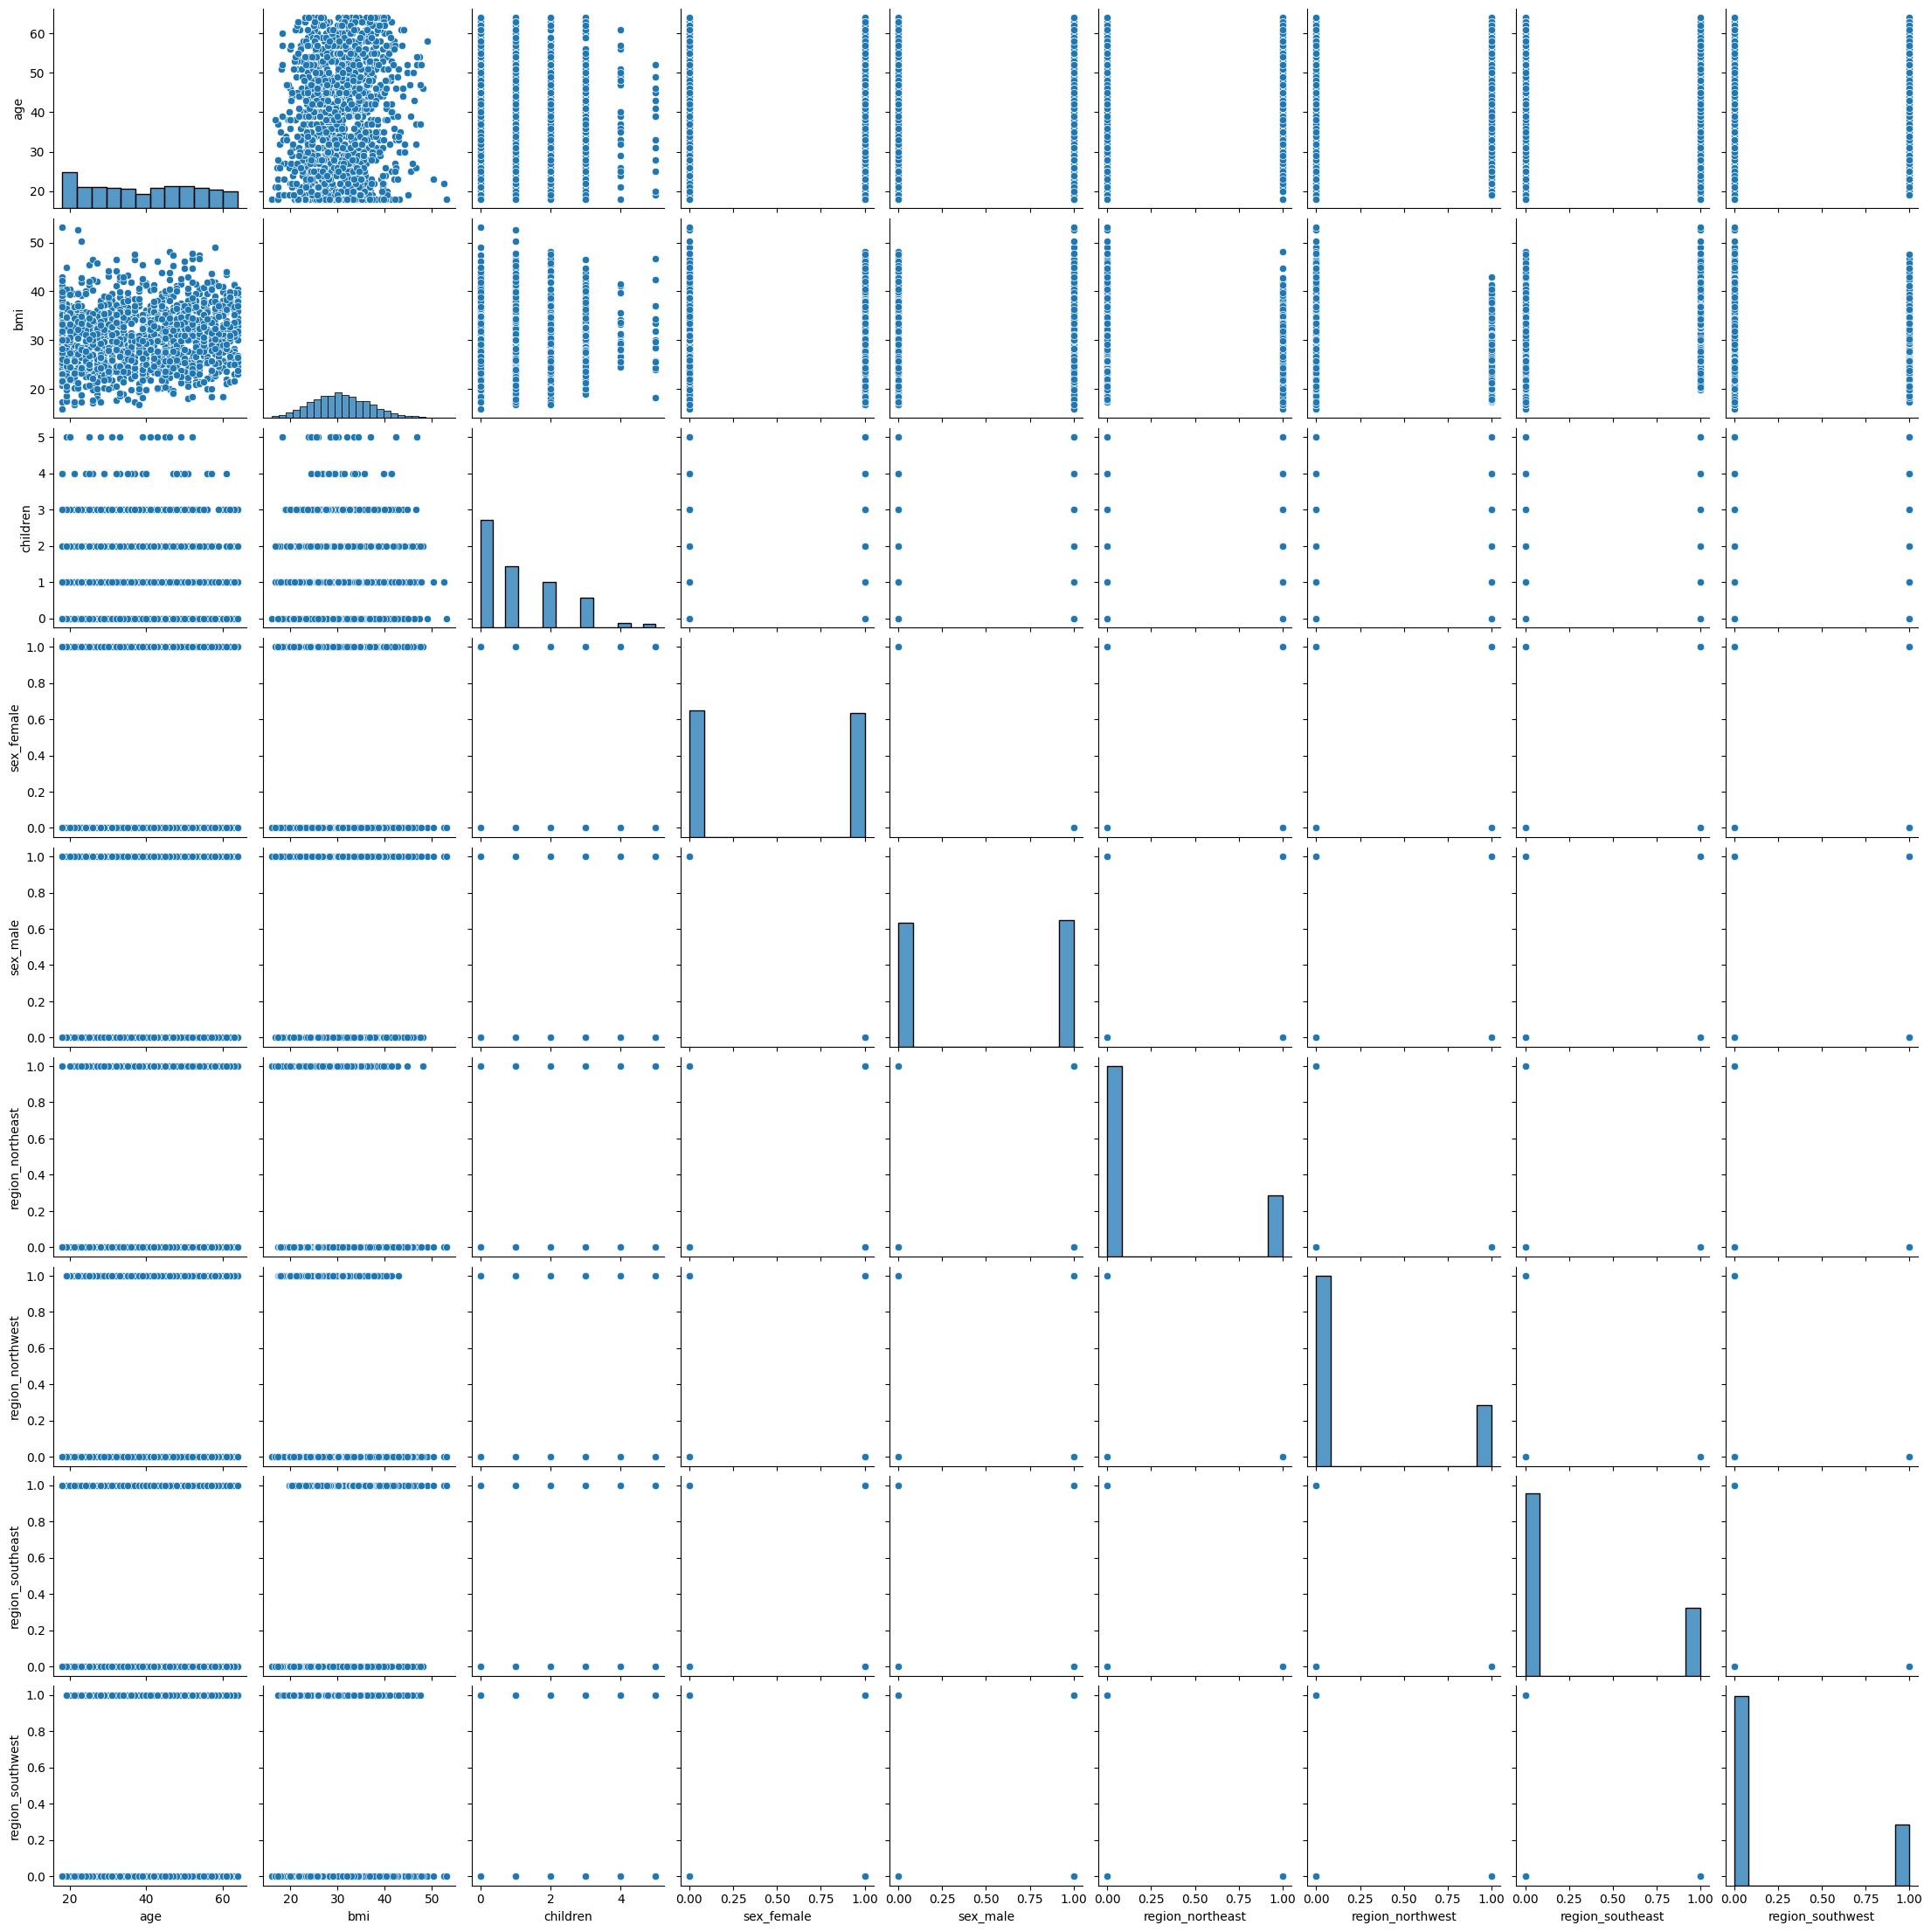

In [48]:
sns.pairplot(df.drop(columns=['charges'], axis=1).select_dtypes(include=np.number))

<Axes: >

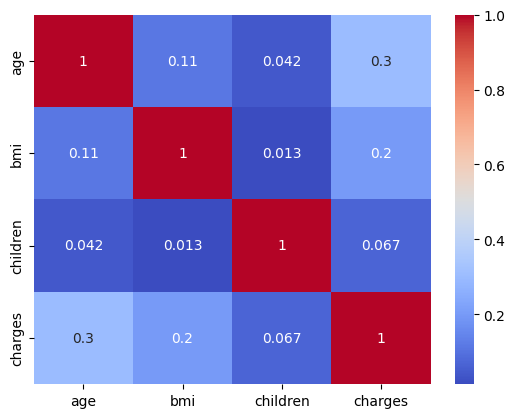

In [49]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')

There is no collinearity between numeric features

#### Categorical Features

In [50]:
def chi2(X, correction=True):
    col_pairs = list(combinations(X.columns, 2))
    results_list = []
    for col1, col2 in col_pairs:
        contingency = pd.crosstab(
            X[col1],
            X[col2]
        )
        chi2, p_val, dof, exp_freq = stats.chi2_contingency(
            contingency.values, correction=correction
        )
        results_list.append([col1, col2, chi2, p_val, dof])
    results = pd.DataFrame(
        results_list,
        columns=[
            'column1', 'column2', 'chi_squared', 'p_value', 'dof'
        ]
    )
    return results

In [51]:
X_chi2 = chi2(df.select_dtypes(include=np.object_))
X_chi2

,column1,column2,chi_squared,p_value,dof
0,sex,smoker,7.469139,0.006277,1
1,sex,region,0.476910,0.923934,3
2,smoker,region,7.277903,0.063548,3


In [52]:
X_chi2[X_chi2['p_value'] < 0.05]

,column1,column2,chi_squared,p_value,dof
0,sex,smoker,7.469139,0.006277,1


- We can use the p-value to test how likely the observed distribution for each given feature pair happened due to chance. The only feature with p-value less than threshold 0.05 is 'sex' and 'smoker', which suggests these features are likely correlated.
- From Univariate analysis, 'sex' has no relation with charges. So removing 'sex' column.

In [53]:
df.drop(columns=['sex'], axis=1, inplace=True)

#### Numeric - Categorical Features

In [54]:
def anova(X):
    num_cols = X.select_dtypes(np.number).columns
    cat_cols = X.select_dtypes(object).columns
    col_pairs = list(product(num_cols, cat_cols))
    results_list = []
    for num_col, cat_col in col_pairs:
        X_filtered_list = []
        cat_values = X[cat_col].unique()
        for cat_value in cat_values:
            X_filtered_list.append(X[X[cat_col] == cat_value][num_col].values)
        f_stat, p_val = stats.f_oneway(*X_filtered_list)
        results_list.append([num_col, cat_col, f_stat, p_val])
    results = pd.DataFrame(
        results_list,
        columns=[
            'num_column', 'cat_column', 'f_stat', 'p_value'
        ]
    )
    return results

In [55]:
data_anova = anova(df.drop(columns=['charges'], axis=1))
data_anova

,num_column,cat_column,f_stat,p_value
0,age,smoker,0.874598,3.498547e-01
1,age,region,0.080765,9.704766e-01
2,bmi,smoker,0.018736,8.911471e-01
3,bmi,region,39.485939,1.908729e-24
4,children,smoker,0.071756,7.888386e-01
5,children,region,0.745299,5.251146e-01
6,sex_female,smoker,7.878567,5.075132e-03
7,sex_female,region,0.158551,9.241867e-01
8,sex_male,smoker,7.878567,5.075132e-03
9,sex_male,region,0.158551,9.241867e-01


In [56]:
data_anova[data_anova['p_value'] < 0.05]

,num_column,cat_column,f_stat,p_value
3,bmi,region,39.485939,1.908729e-24
6,sex_female,smoker,7.878567,5.075132e-03
8,sex_male,smoker,7.878567,5.075132e-03
11,region_northeast,region,inf,0.000000e+00
13,region_northwest,region,inf,0.000000e+00
14,region_southeast,smoker,6.253595,1.251324e-02
15,region_southeast,region,inf,0.000000e+00
17,region_southwest,region,inf,0.000000e+00


- The only feature pair with a p-value less than the threshold 0.05 is bmi and region, which suggests these features are likely correlated.
- Since 'region' does not affect target variable 'charges', we remove it.

In [57]:
df.drop(columns=['region'], axis=1, inplace=True)

### Encoding

In [58]:
# Label encoding 'smoker'
df['smoker'] = df['smoker'].map(lambda x: 1 if x=='yes' else 0)

### Correlation Analysis

<Axes: >

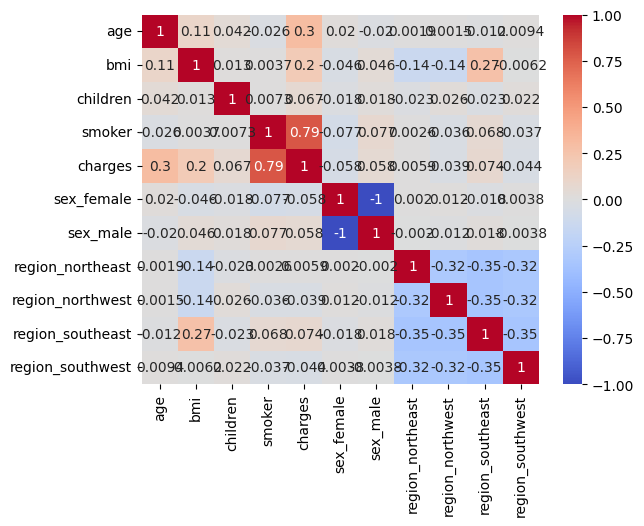

In [59]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

There is no correlation between features

### Scaling

<Axes: xlabel='charges', ylabel='Count'>

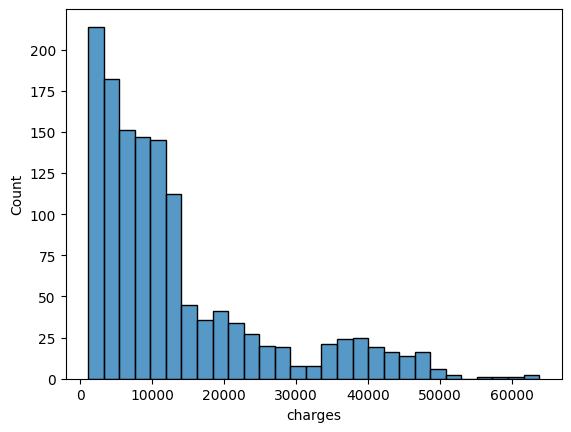

In [60]:
sns.histplot(df['charges'])

Since target 'charge' is left-skewed, we perform Yeo-Johnson transformation for Homoscedasticity

In [61]:
pt = PowerTransformer(method='yeo-johnson')
df['charges'] = pt.fit_transform(df[['charges']])
df

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0.680919,1,0,0,0,0,1
1,18,33.770,1,0,-1.751785,0,1,0,0,1,0
2,28,33.000,3,0,-0.770779,0,1,0,0,1,0
3,33,22.705,0,0,0.978309,0,1,0,1,0,0
4,32,28.880,0,0,-0.918699,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0.164599,0,1,0,1,0,0
1334,18,31.920,0,0,-1.501296,1,0,1,0,0,0
1335,18,36.850,0,0,-1.809599,1,0,0,0,1,0
1336,21,25.800,0,0,-1.597538,1,0,0,0,0,1


### Save Dataframe

In [63]:
df.to_csv("./data/transformed_data.csv", index=False)